## Proje Adı:Filmlerin Gelecekteki Oranlarının Tahmin Edilmesi


In [33]:
import csv
import datetime
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline  
import warnings
warnings.filterwarnings("ignore")
import json
import ast
import seaborn as sns
sns.set_style('whitegrid')
data = pd.read_csv('movies_metadata.csv') #45466 rows 
print ("data Shape: ", data.shape)



data Shape:  (45466, 24)


## Veri Bigileri

In [34]:
## Veri Bigileri 
#data.columns
releList=data['release_date'][data['release_date'].isna()].index.tolist()
data=data.drop(releList) 
data.reset_index(drop=True, inplace=True)

#['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
# 'imdb_id', 'original_language', 'original_title', 'overview',
#      'popularity', 'poster_path', 'production_companies',
#      'production_countries', 'release_date', 'revenue', 'runtime',
#       'spoken_languages', 'status', 'tagline', 'title', 'video',
#       'vote_average', 'vote_count']#

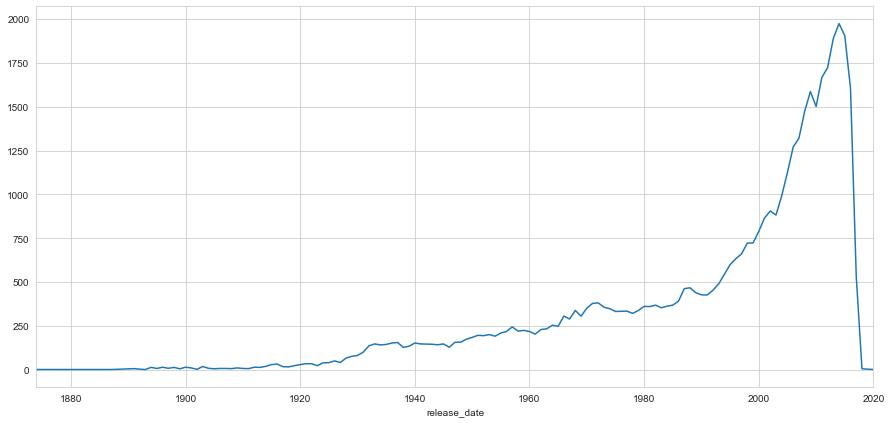

In [35]:
for i in data['release_date'].index:
    data.loc[i,'release_date']=data['release_date'][i].split("-")[0]
    
data.drop(data.index[19714], inplace=True)
data.reset_index(drop=True, inplace=True)
data.drop(data.index[29471], inplace=True)
data.reset_index(drop=True, inplace=True)
data.drop(data.index[35541], inplace=True)
data.reset_index(drop=True, inplace=True)

data['release_date']=data['release_date'].astype(int)
fig, ax = plt.subplots(figsize=(15,7))
data['release_date'].groupby(data.release_date).agg('count').plot(ax=ax)


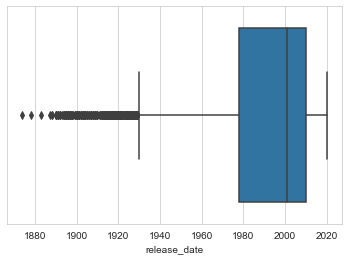

In [99]:
sns.boxplot(x= data['release_date'])

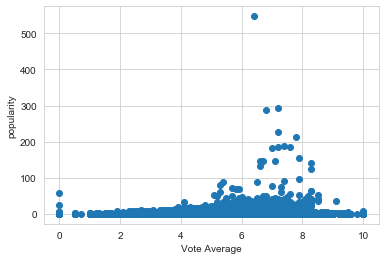

In [36]:
plt.scatter(data.vote_average,data.popularity) 
plt.xlabel("Vote Average")
plt.ylabel("popularity")
plt.show()

Text(0.5, 1.0, 'Distribution of Movie Ratings')

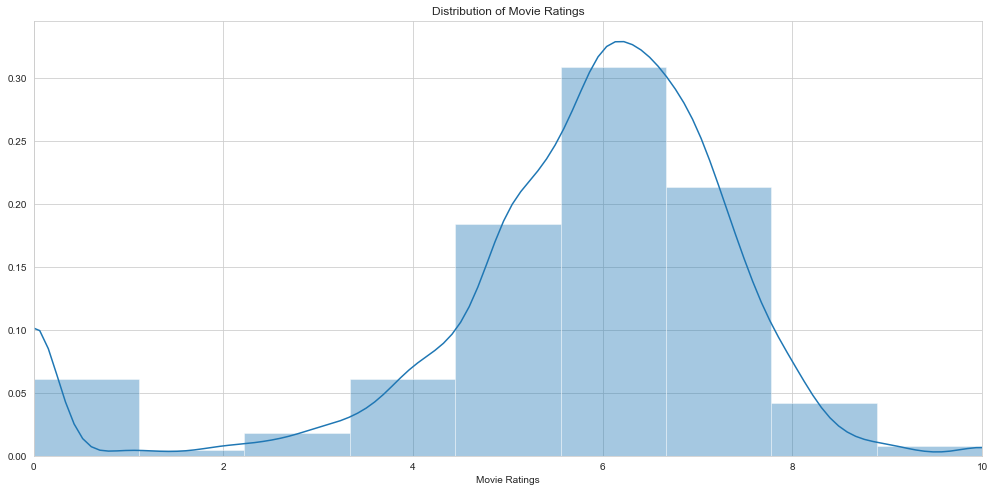

In [58]:
plt.figure(figsize=(17,8))
ax = sns.distplot(data['vote_average'], bins=9, kde_kws={"bw": 0.25}, 
                  axlabel='Movie Ratings')
ax.set(xlim=(0, 10))
ax.set_title("Distribution of Movie Ratings")

In [37]:
runtimelist=data['runtime'][data['runtime'].isna()].index.tolist()
data=data.drop(runtimelist) 
data.reset_index(drop=True, inplace=True)
data['runtime']=data['runtime'].astype(float)

runtimezerolist=data['runtime'][data['runtime']==0.0].index.tolist()
data=data.drop(runtimezerolist) 
data.reset_index(drop=True, inplace=True)


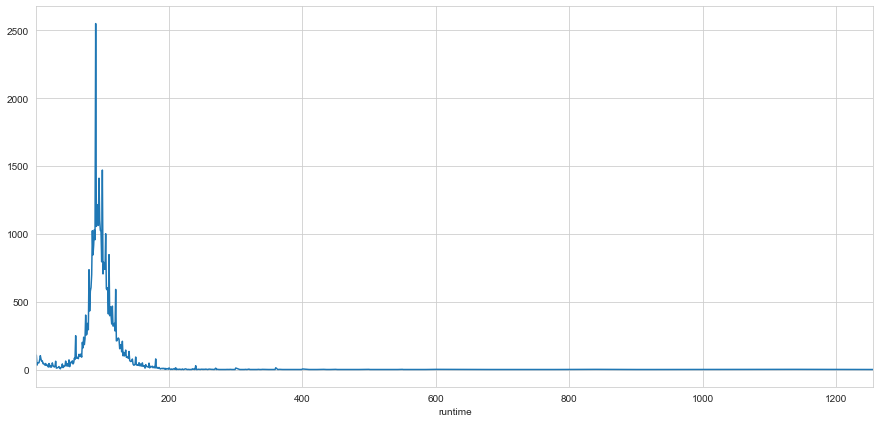

In [101]:
fig, ax = plt.subplots(figsize=(15,7))
data['runtime'].groupby(data.runtime).agg('count').plot(ax=ax)

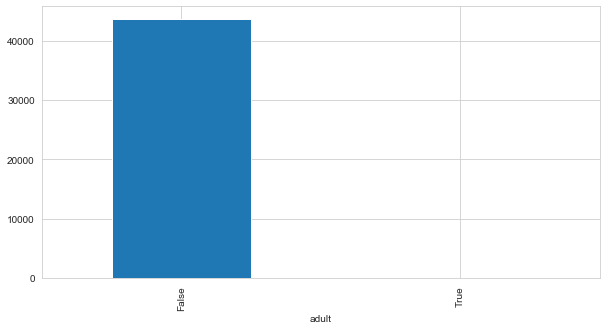

In [102]:
adult_groups = data.groupby([data['adult']])['adult'].count()
adult_groups.plot(kind='bar',figsize=(10,5),legend=None)

In [38]:
##preprocessing for genres:
def decode_str_dict(x):
    try:
        out=eval(x)[0]['name']
    except Exception:
        try:
            out=eval(x)['name']
        except Exception:
            try:
                out=eval(x)
            except Exception:
                out=x
    return out

data['genres']=data['genres'].apply(decode_str_dict)
##data
data['genres'] = data['genres'].replace({'Fantasy': 1,'Drama': 2, 'Comedy' : 3, 'Adventure' : 4,'Horror' : 5, 
                                         'Crime' : 6 , 'Animation' : 7, 'Action' : 8,
                                         'Mystery' :9,'Western': 10, 'Romance' : 11,
                                         'War' : 12,'Family' : 13 ,'Documentary': 14,'Music': 15, 
                                         'History' : 16, 'Science Fiction' : 17,'TV Movie':18,
                                         'Foreign':19,'Thriller':20})
count=0
emptyList=[]
for i in data['genres'].index:
    if not data['genres'][i]:
        emptyList.append(data.index[i]) 
        count=count+1
        
print('Total bos liste sayisi',count)  
data=data.drop(emptyList) 
data.reset_index(drop=True, inplace=True)
data['genres']=data['genres'].astype(int)  

Total bos liste sayisi 1874


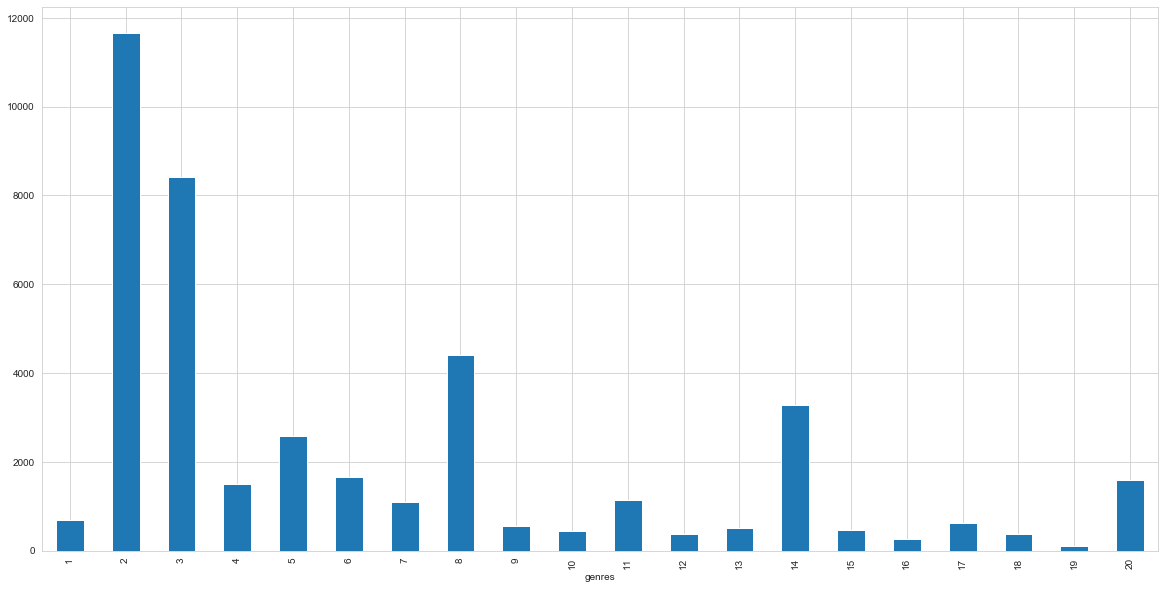

In [62]:
#genre visualization
genre_groups = data.groupby([data['genres']])['genres'].count()
genre_groups.plot(kind='bar',figsize=(20,10),legend=None)

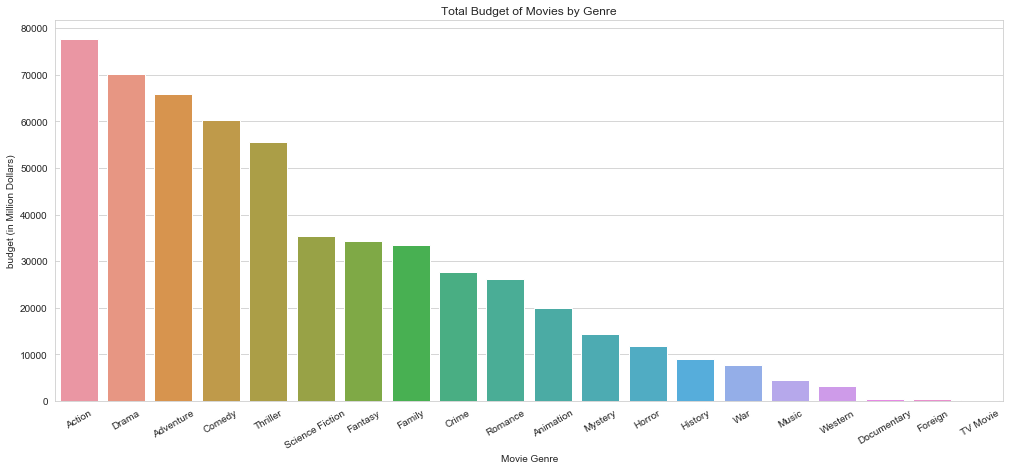

In [104]:
movies = pd.read_csv('movies_metadata.csv',dtype='unicode') #45466 rows × 24 columns
movies[movies['budget'].str.contains("jpg")]
movies.drop(movies.index[19730], inplace=True)
movies.reset_index(drop=True, inplace=True)
movies.drop(movies.index[29502], inplace=True)
movies.reset_index(drop=True, inplace=True)
movies.drop(movies.index[35585], inplace=True)
movies.reset_index(drop=True, inplace=True)

movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce').apply(lambda x: x.date())
json_columns = ['belongs_to_collection', 'genres', 'production_companies', 'production_countries', 'spoken_languages']
for column in json_columns:
    movies[column] = movies[column].apply(lambda x: np.nan if pd.isnull(x) else ast.literal_eval(x))
    

genre_revenue = {}

for i in range(movies.shape[0]):
    for item in movies['genres'][i]:
        if 'name' in item and movies.iloc[i]['budget'] is not np.nan:
            a = item['name']
            b = int(movies.iloc[i]['budget'])/1000000
            if a in genre_revenue:
                genre_revenue[a]['total_budget'] += b 
            else:
                genre_revenue[a] = {}
                genre_revenue[a]['genre'] = a
                genre_revenue[a]['total_budget'] = b

most_profitable_genre = pd.DataFrame(None,None,columns=['genre','budget'])

for k,v in genre_revenue.items():
    most_profitable_genre =  most_profitable_genre.append({'genre':v['genre'],'budget':v['total_budget']},ignore_index=True)
    
    
most_profitable_genre = most_profitable_genre.sort_values(by='budget',ascending=False)    
    
plt.figure(figsize=(17,7))
ax = sns.barplot(x=most_profitable_genre['genre'],y=most_profitable_genre['budget'])
x=ax.set_xlabel("Movie Genre")
b=ax.set_ylabel("budget (in Million Dollars)")
c=ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=30)
d=ax.set_title("Total Budget of Movies by Genre")   
    

In [39]:
def process(data):
    #data = data.drop(data.columns[[0,1,3,4,5,6,7,8,9,11,12,13,14,17,18,19,20,21]],axis=1)
    data = data.drop(data.columns[[1,4,5,6,8,9,11,12,13,17,19,20,21]],axis=1)
    #data[data['budget'].str.contains("jpg")]
    #data.drop(data.index[19730], inplace=True)
    #data.reset_index(drop=True, inplace=True)
    #data.drop(data.index[29502], inplace=True)
    #data.reset_index(drop=True, inplace=True)
    #data.drop(data.index[35585], inplace=True)
    #data.reset_index(drop=True, inplace=True)
    data.drop_duplicates() 
    data.reset_index(drop=True, inplace=True)
    data['budget'] = data['budget'].astype(int)
    data = data.replace(0,float("NaN"))
    data.budget.fillna(value=data['budget'].mean(),inplace=True)
    data['popularity'] = data['popularity'].fillna(0)
    data['popularity'] = data['popularity'].astype(float)
    data.popularity.fillna(value=data['popularity'].mean(),inplace=True)
    data.revenue.fillna(value=data['revenue'].mean(),inplace=True)
    data.runtime.fillna(value=data['runtime'].median(),inplace=True)
    data.vote_count.fillna(value=data['vote_count'].mean(),inplace=True)
    data = data.dropna(how='any',axis=0)
    data.reset_index(drop=True, inplace=True)
    data['runtime'] = data['runtime'].astype(int)
    
    return data


In [40]:
#outlier detection 
def remove_outlier(data, col_name):
    OutlierList=[]
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    lower  = q1-1.5*iqr
    higher = q3+1.5*iqr
    mean=data[col_name].mean()
    countOutlier=0
    for i in data[col_name].index:
        if((data[col_name][i]< lower )| (data[col_name][i]> higher)):
            countOutlier=countOutlier+1
            OutlierList.append(i)
            #data.loc[i,col_name]=mean
    print('Outlier sayisi',countOutlier) 
    return OutlierList

In [41]:
def fillClassValue(y):
    for i in range(len(y)):
        if(0<=y[i]<3):
            y[i]=1
        elif (3<=y[i]<5):
            y[i]=2
        elif (5<=y[i]<7):
            y[i]=3
        elif (7<=y[i]<=10):
            y[i]=4
        else:    
            y[i]=0
        

In [42]:
def fillClassValue(data):
    for i in data['vote_average'].index:
        if(0<=data['vote_average'][i]<3):
            data.loc[i,'vote_average']=1
        elif (3<=data['vote_average'][i]<5):
            data.loc[i,'vote_average']=2
        elif (5<=data['vote_average'][i]<7):
            data.loc[i,'vote_average']=3
        elif (7<=data['vote_average'][i]<=10):
            data.loc[i,'vote_average']=4
        else:    
            data.loc[i,'vote_average']=5
    return data              

In [43]:
data=process(data)

In [44]:
#yukarıdaki adım cok uzun sürdügünden o asamadan sonra baska bir dosyaya kayıt edilmistir
data.drop( "budget", inplace = True, axis = 1 ) 
data.drop( "revenue", inplace = True, axis = 1 ) 
data.drop( "adult", inplace = True, axis = 1 ) 
data.reset_index(drop=True, inplace=True)
#data=fillClassValue(data)
data['vote_average']=data['vote_average'].astype(int)


In [45]:
#preprocessing for original language


data['original_language'] = data['original_language'].replace({'en': 1,'fr': 2, 'zh' : 3, 'it' : 4,'fa' : 5, 'nl' : 6 ,'de': 7,'cn': 8, 'ar' : 9, 'es' : 10,'ru' :11,'sv' : 12 ,'ja': 13,'ko': 14, 'sr' : 15, 'bn' : 16,'he' :17, 'pt' : 18 ,'wo': 19,'ro': 20, 'hu' : 21, 'cy' : 22,
                                                               'vi' : 23, 'cs' : 24 , 'da' : 25, 'no' : 26, 'nb' : 27, 'pl' : 28, 'el' : 29, 'sh' : 30, 'xx' : 31, 'mk' : 32, 'bo' : 33,
                                                               'ca': 34, 'fi': 35, 'th': 36, 'sk': 37, 'bs': 38, 'hi': 39, 'tr': 40, 'is': 41, 'ps': 42, 'ab': 43, 'eo': 44,
                                                               'ka':45, 'mn':46, 'bm':47, 'zu':48, 'uk':49, 'af':50, 'la':51, 'et':52, 'ku':53, 'lv':54, 'ta':55,
                                                               'sl':56, 'tl':57, 'ur':58, 'rw':59, 'id':60, 'bg':61, 'mr':62, 'lt':63, 'kk':64, 'ms':65, 'sq':66,
                                                               'qu':67, 'te':68, 'am':69, 'jv':70, 'tg':71, 'ml':72, 'hr':73, 'lo':74, 'ay':75, 'kn':76, 'ne':77,
                                                               'pa':78, 'gl':79, 'ky':80, 'sm':81, 'eu':82, 'hy':83, 'iu':84, 'si':85
                                                              })
data['original_language']=data['original_language'].astype(int)
   

Text(0.5, 1.0, 'Bar Chart - Original Language')

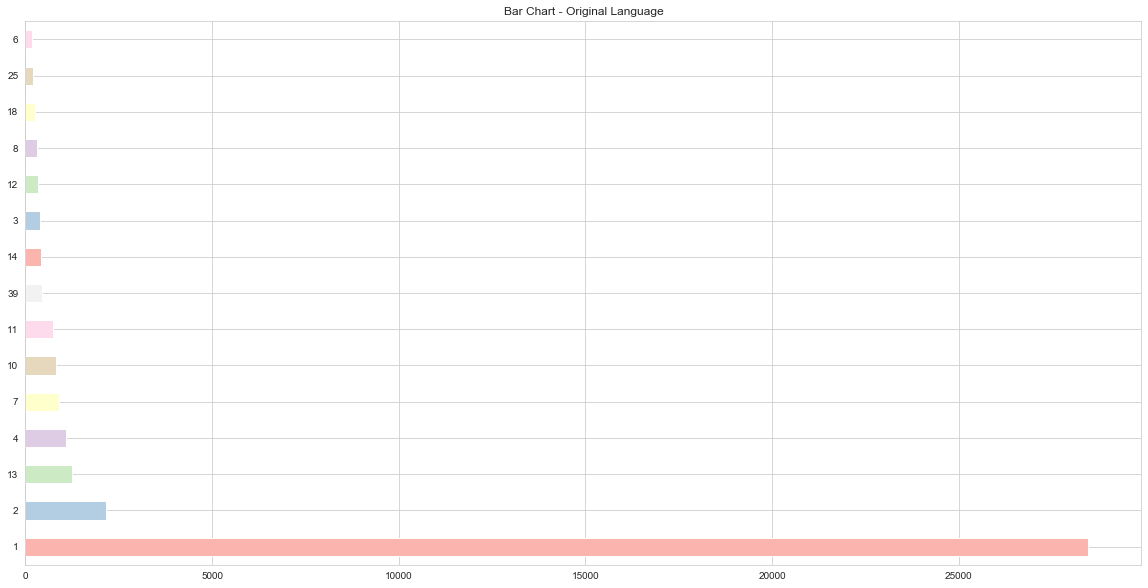

In [25]:
# Distribution of the 10 Title Types (bar chart)
cmap = plt.get_cmap('Pastel1')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

import matplotlib.pyplot as plt
ax = data['original_language'].value_counts().head(15).plot(kind='barh', figsize=(20,10), color=colors)
# color=(0.2, 0.4, 0.6, 0.6),
plt.title('Bar Chart - Original Language')



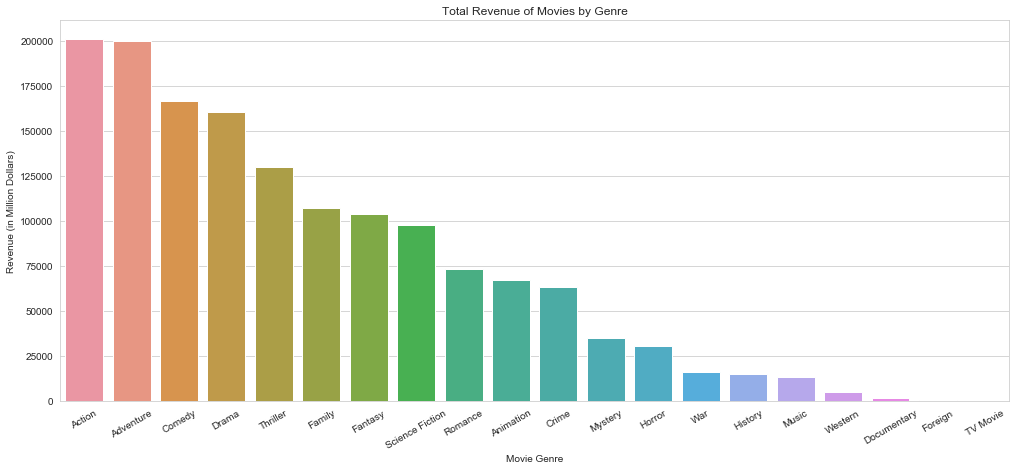

In [72]:
genre_revenue = {}

for i in range(movies.shape[0]):
    for item in movies['genres'][i]:
        if 'name' in item and movies.iloc[i]['revenue'] is not np.nan:
            a = item['name']
            b = int(movies.iloc[i]['revenue'])/1000000
            if a in genre_revenue:
                genre_revenue[a]['total_revenue'] += b 
            else:
                genre_revenue[a] = {}
                genre_revenue[a]['genre'] = a
                genre_revenue[a]['total_revenue'] = b

most_profitable_genre = pd.DataFrame(None,None,columns=['genres','revenue'])

for k,v in genre_revenue.items():
    most_profitable_genre =  most_profitable_genre.append({'genres':v['genre'],'revenue':v['total_revenue']},ignore_index=True)
    
    
most_profitable_genre = most_profitable_genre.sort_values(by='revenue',ascending=False)    
    
plt.figure(figsize=(17,7))
ax = sns.barplot(x=most_profitable_genre['genres'],y=most_profitable_genre['revenue'])
x=ax.set_xlabel("Movie Genre")
b=ax.set_ylabel("Revenue (in Million Dollars)")
c=ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=30)
d=ax.set_title("Total Revenue of Movies by Genre")   
    

In [46]:
#preprocessing for status

statuslist=data['status'][data['status'].isna()].index.tolist()
data=data.drop(statuslist) 
data.reset_index(drop=True, inplace=True)
#preprocessing for status

data['status'] = data['status'].replace({'Released':0, 'Rumored':1, 'Post Production':2,'In Production':3,
                                         'Planned':4,'Canceled':5
                                        })
data['status']=data['status'].astype(int)


   

In [47]:
data.isnull().sum()  # null olan değerler var mı kontrolü yapılır.

genres               0
original_language    0
popularity           0
release_date         0
runtime              0
status               0
vote_average         0
vote_count           0
dtype: int64

In [ ]:
#preprocessing for adult

data['adult'] = data['adult'].replace({'False':0, 'True':1
                                        })
data['adult']=data['adult'].astype(int)
data['release_date']=data['release_date'].astype(int)           


In [48]:
voteList=data['vote_count'][data['vote_count']==0].index.tolist()
data=data.drop(voteList) 
data.reset_index(drop=True, inplace=True)


In [204]:
#before outlier detection
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.naive_bayes import GaussianNB,BernoulliNB
import pickle
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics


#y = np.array(data['vote_average'])
#fillClassValue(y)
#data.drop( "vote_average", inplace = True, axis = 1 ) 
#X = np.array(data)

def LogRegression(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    model = LogisticRegression(solver='newton-cg',multi_class='ovr',max_iter=200,penalty='l2')
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy') 
    print(scores)


def Svm(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    model = svm.SVC()
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    #_pickle_it(model,"svm_thre1")
    print('SVM',accuracy_score(y_test,predictions)*100)

def naiveBayes(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    model_guass = GaussianNB()
    model = BernoulliNB()
    model_guass.fit(X_train,y_train)
    model.fit(X_train,y_train)
    predictions_gauss = model_guass.predict(X_test)
    predictions = model.predict(X_test)
    #_pickle_it(model,"Bernoulli_thre1")
    #_pickle_it(model_guass,"guass_thre1")
    print('naive bayes using gaussian',accuracy_score(y_test,predictions_gauss)*100)
    print('naive bayes using Bernoulli',accuracy_score(y_test,predictions)*100)

LogRegression(X,y)
Svm(X,y)
naiveBayes(X,y)

[0.62525202 0.62314091 0.61759516 0.62263675 0.61683892 0.62188051
 0.6208722  0.61935972 0.6034787  0.61885556]
SVM 61.93076793816166
naive bayes using gaussian 24.29003528818686
naive bayes using Bernoulli 61.70391530835154


In [ ]:
OutlierList=remove_outlier(data,'budget')
data=data.drop(OutlierList) 
data.reset_index(drop=True, inplace=True)
OutlierList=remove_outlier(data,'revenue')
data=data.drop(OutlierList) 
data.reset_index(drop=True, inplace=True)

In [29]:
OutlierList=remove_outlier(data,'popularity')
data=data.drop(OutlierList) 
data.reset_index(drop=True, inplace=True)
OutlierList=remove_outlier(data,'original_language')
data=data.drop(OutlierList) 
data.reset_index(drop=True, inplace=True)
OutlierList=remove_outlier(data,'runtime')
data=data.drop(OutlierList) 
data.reset_index(drop=True, inplace=True)
OutlierList=remove_outlier(data,'vote_count')
data=data.drop(OutlierList) 
data.reset_index(drop=True, inplace=True)
OutlierList=remove_outlier(data,'release_date')
data=data.drop(OutlierList) 
data.reset_index(drop=True, inplace=True)

Outlier sayisi 2686
Outlier sayisi 8525
Outlier sayisi 2566
Outlier sayisi 3545
Outlier sayisi 41


In [49]:
data.to_csv(r'after_preprocessing_steps.csv')
data = pd.read_csv('after_preprocessing_steps.csv') 
data.drop( "Unnamed: 0", inplace = True, axis = 1 )
data.reset_index(drop=True, inplace=True)


In [21]:
y = np.array(data['vote_average'])
data.drop( "vote_average", inplace = True, axis = 1 ) 
data.reset_index(drop=True, inplace=True)
X = np.array(data)

Optimal number of features : 6
Best features : ['genres', 'original_language', 'popularity', 'release_date', 'runtime', 'vote_count']


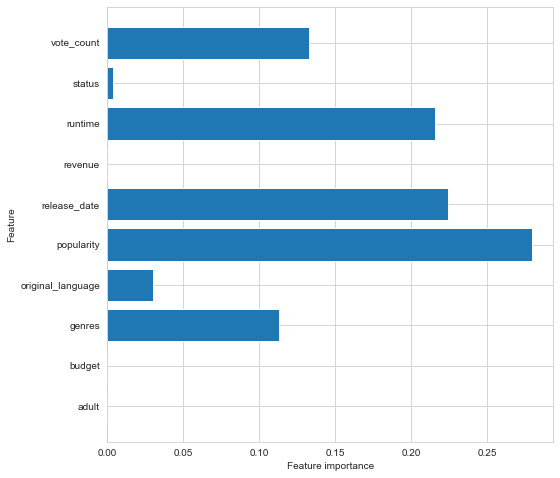

In [37]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeClassifier 

cv_estimator = RandomForestClassifier(random_state =42)
cv_estimator.fit(data, y)
cv_selector = RFECV(cv_estimator,cv= 5, step=1,scoring='accuracy')
cv_selector = cv_selector.fit(data, y)
rfecv_mask = cv_selector.get_support() 
rfecv_features = [] 
for bool, feature in zip(rfecv_mask, data.columns):
    if bool:
        rfecv_features.append(feature)
    
print('Optimal number of features :', cv_selector.n_features_)
print('Best features :', rfecv_features)
n_features = data.shape[1]
plt.figure(figsize=(8,8))
plt.barh(range(n_features), cv_estimator.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), data.columns.values) 
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [80]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression

def featureImportances(data,y):
    train_x,X_test,train_y,y_test = train_test_split(X,y,test_size=0.3,random_state=1)


    rfc = RandomForestClassifier(n_estimators=100, max_features=5) 
    rfc = rfc.fit(X,y)
    feature_importances = pd.DataFrame(rfc.feature_importances_,
                                  index = data.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
    
    print('RandomForestClassifier Feature Importances:',feature_importances)
    
    clf = DecisionTreeClassifier()
    clf = clf.fit(X,y)
    feature_importances = pd.DataFrame(clf.feature_importances_,
                                  index = data.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
    print('DecisionTreeClassifier Feature Importances:',feature_importances)
    
    sgb = GradientBoostingClassifier(n_estimators=100, random_state=42)
    sgb = sgb.fit(train_x,train_y)
    feature_importances = pd.DataFrame(sgb.feature_importances_,
                                  index = data.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
    print('GradientBoostingClassifier Feature Importances:',feature_importances)
    


featureImportances(data,y)

RandomForestClassifier Feature Importances:                    importance
popularity           0.288643
release_date         0.222923
runtime              0.211247
vote_count           0.130345
genres               0.113410
original_language    0.028928
status               0.004302
adult                0.000203
budget               0.000000
revenue              0.000000
DecisionTreeClassifier Feature Importances:                    importance
popularity           0.317745
release_date         0.218092
runtime              0.216027
vote_count           0.115996
genres               0.099331
original_language    0.028691
status               0.004119
adult                0.000000
budget               0.000000
revenue              0.000000
GradientBoostingClassifier Feature Importances:                    importance
genres               0.301519
vote_count           0.209809
release_date         0.194681
runtime              0.119087
popularity           0.110405
original_language    0.0

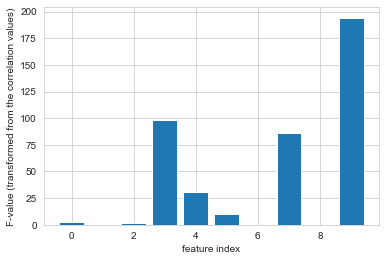

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

train_x,X_test,train_y,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

f_selector = SelectKBest(score_func=f_regression, k='all')
f_selector.fit(train_x, train_y)
X_train_fs = f_selector.transform(train_x)
# transform test input data
X_test_fs = f_selector.transform(X_test)
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()

In [207]:
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.naive_bayes import GaussianNB,BernoulliNB
import pickle


# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)


# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[0.58215726 0.59364759 0.57827073 0.55432317 0.54575246 0.5477691
 0.50617595 0.50642803 0.48273254 0.49710108]
0.5394357913471625


Optimal number of features : 6
Best features : ['genres', 'original_language', 'popularity', 'release_date', 'runtime', 'vote_count']


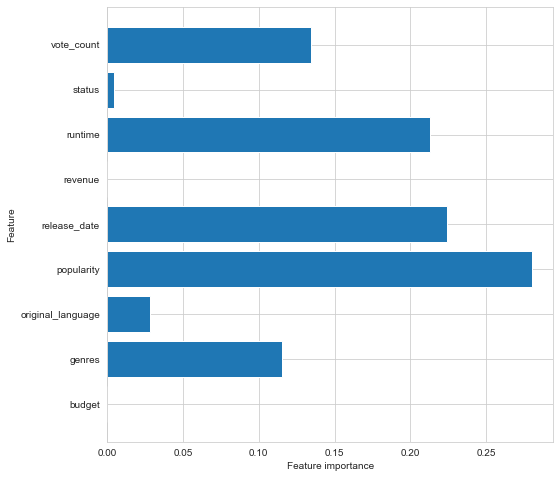

In [38]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import IsolationForest
from sklearn.tree import DecisionTreeClassifier 

cv_estimator = RandomForestClassifier(random_state =42)
cv_estimator.fit(data, y)
cv_selector = RFECV(cv_estimator,cv= 5, step=1,scoring='accuracy')
cv_selector = cv_selector.fit(data, y)
rfecv_mask = cv_selector.get_support() 
rfecv_features = [] 
for bool, feature in zip(rfecv_mask, data.columns):
    if bool:
        rfecv_features.append(feature)
    
print('Optimal number of features :', cv_selector.n_features_)
print('Best features :', rfecv_features)
n_features = data.shape[1]
plt.figure(figsize=(8,8))
plt.barh(range(n_features), cv_estimator.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), data.columns.values) 
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [208]:
def LogRegression(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    model = LogisticRegression(solver='newton-cg',multi_class='ovr',max_iter=200,penalty='l2')
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy') 
    print(scores.mean())


def Svm(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    model = svm.SVC()
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    #_pickle_it(model,"svm_thre1")
    print('SVM',accuracy_score(y_test,predictions)*100)

def naiveBayes(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    model_guass = GaussianNB()
    model = BernoulliNB()
    model_guass.fit(X_train,y_train)
    model.fit(X_train,y_train)
    predictions_gauss = model_guass.predict(X_test)
    predictions = model.predict(X_test)
    #_pickle_it(model,"Bernoulli_thre1")
    #_pickle_it(model_guass,"guass_thre1")
    print('naive bayes using gaussian',accuracy_score(y_test,predictions_gauss)*100)
    print('naive bayes using Bernoulli',accuracy_score(y_test,predictions)*100)



In [209]:
LogRegression(X,y)
Svm(X,y)
naiveBayes(X,y)

0.6189910448193566
SVM 61.93076793816166
naive bayes using gaussian 24.29003528818686
naive bayes using Bernoulli 61.70391530835154


In [211]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.naive_bayes import GaussianNB,BernoulliNB
import pickle
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
def LogRegression(X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)
    model = LogisticRegression(solver='newton-cg',multi_class='ovr',max_iter=200,penalty='l2')
    scores = cross_val_score(model, X, y, cv=10, scoring='accuracy') 
    print(scores)
    print(scores.mean())

In [124]:
LogRegression(X,y)

[0.61452264 0.61452264 0.61452264 0.61452264 0.61452264 0.61452264
 0.61407441 0.61407441 0.60807175 0.59461883]
0.6117975208688013


In [218]:
LogRegression(X,y)
Svm(X,y)
naiveBayes(X,y)

0.6189910448193566
SVM 61.93076793816166
naive bayes using gaussian 24.29003528818686
naive bayes using Bernoulli 61.70391530835154


In [167]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_sm, y_sm = sm.fit_sample(data, y, )
print ('Shape of oversampled data: {}'.format(X_sm.shape))
print ('Shape of Y: {}'.format(y_sm.shape))

Shape of oversampled data: (54824, 8)
Shape of Y: (54824,)


In [215]:
#preprocessing for numeric features
def normalizeForNumericFeatures(data,column):
    max_value = data[column].max()
    min_value = data[column].min()
    for i in range(len(data)):
        data.loc[i,column]=(data.loc[i,column] - min_value) / (max_value - min_value)

In [216]:
normalizeForNumericFeatures(data,'release_date')

In [219]:
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.naive_bayes import GaussianNB,BernoulliNB
import pickle


# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, X_sm, y_sm, cv=10, scoring='accuracy')
print(scores)


# use average accuracy as an estimate of out-of-sample accuracy
print('KNN:',scores.mean())



model_guass = GaussianNB()
model = BernoulliNB()
scores_model_bernoulli = cross_val_score(model, X_sm, y_sm, cv=10, scoring='accuracy')
scores_model_guass = cross_val_score(model_guass, X_sm, y_sm, cv=10, scoring='accuracy')

print('scores_model_bernoulli:',scores_model_bernoulli.mean())
print('scores_model_guass:',scores_model_guass.mean())



rfc = RandomForestClassifier(n_estimators=100, max_features=5)
scores_rfc = cross_val_score(rfc, X_sm, y_sm, cv=10, scoring='accuracy')

print('scores_rfc:',scores_rfc.mean())




[0.59201167 0.57286157 0.59347073 0.6027722  0.60634805 0.61090843
 0.61309741 0.60926669 0.6081722  0.61236775]
KNN: 0.6021276702630924
scores_model_bernoulli: 0.2505290173208251
scores_model_guass: 0.3573595324954855
scores_rfc: 0.5704856369090945


In [174]:
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)



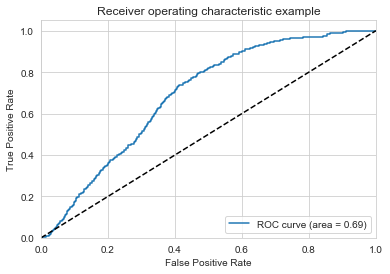

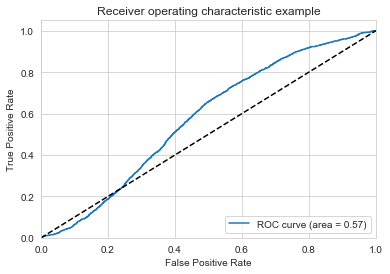

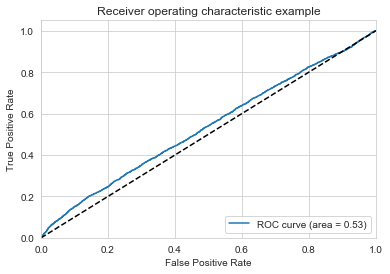

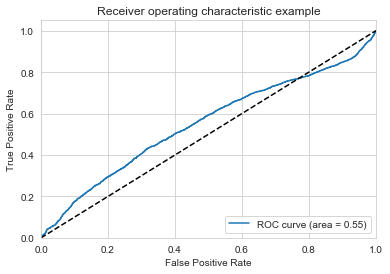

In [222]:
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


y = label_binarize(y, classes=[1,2,3,4])
n_classes = 4

# shuffle and split training and test sets
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.30, random_state=0, shuffle=False)

# classifier
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
sgb = GradientBoostingClassifier(n_estimators=20, random_state=42)
scores_sgb = cross_val_score(rfc, X_sm, y_sm, cv=10, scoring='roc_auc')
print('scores_sgb:',scores_sgb.mean())


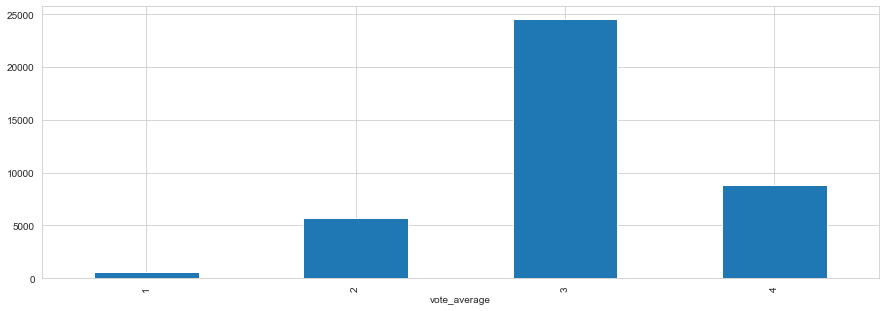

In [247]:

#genre visualization
group_of_class = data.groupby([data['vote_average']])['vote_average'].count()
group_of_class.plot(kind='bar',figsize=(15,5),legend=None)
